****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('PETR4_2018-07-02_2018-07-31.csv')

In [3]:
data_frame.count()

Start                        2497
End                          2497
NegociatedOffersAmount       2497
TotalTradedQuantity          2497
RSIIndicator                 2497
SMAIndicatorDiff             2497
EMAIndicatorDiff             2497
UpperBollingerBand           2497
LowerBollingerBand           2497
MiddleBollingerBand          2497
MACD                         2497
AroonUpIndicator             2497
AroonDownIndicator           2497
AroonIndicator               2497
PlusDirectionalIndicator     2497
MinusDirectionalIndicator    2497
ADXIndicator                 2497
CCI                          2497
CMO                          2497
ROC                          2497
BuySignal                    2497
BidPrice                     2497
Profit                       2497
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.26992390869042854

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.02
1,02/07/2018 11:29:00,02/07/2018 11:32:00,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.02
2,02/07/2018 11:32:00,02/07/2018 11:35:00,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.02
3,02/07/2018 11:35:00,02/07/2018 11:38:00,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0,17.14,0.01
4,02/07/2018 11:38:00,02/07/2018 11:41:00,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.02


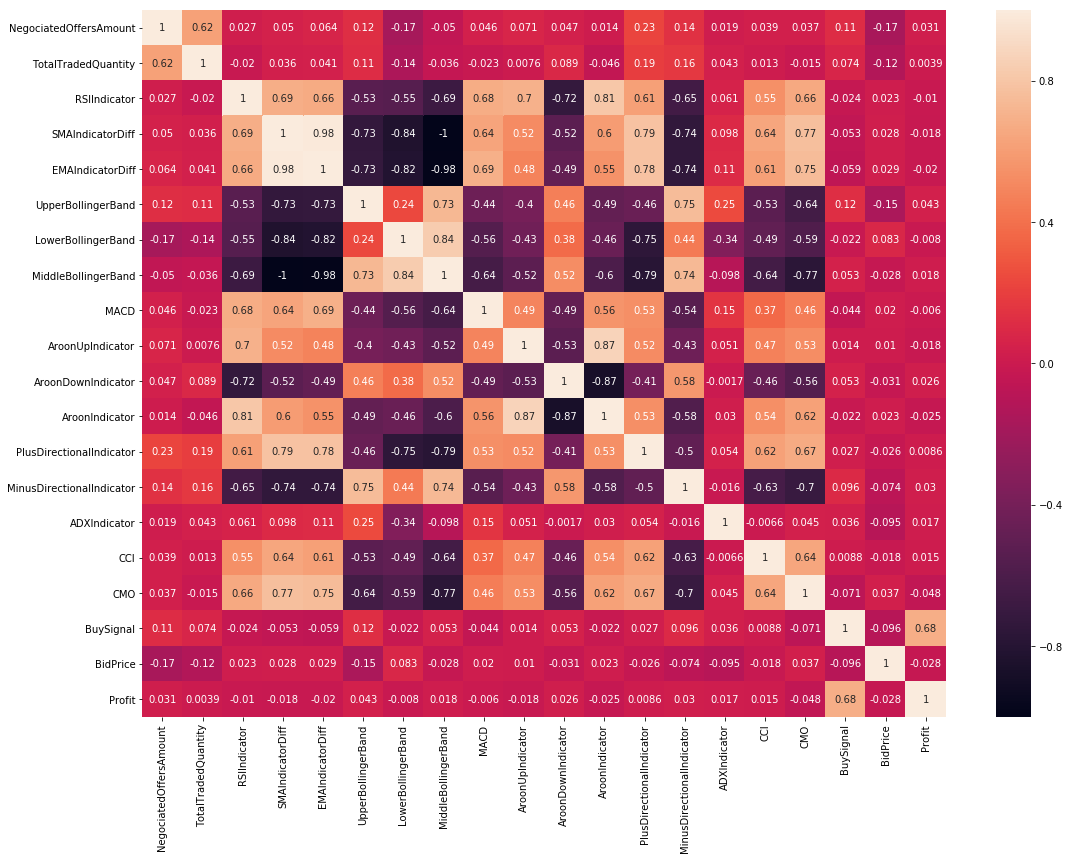

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.02
1,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.02
2,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.02
3,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0,17.14,0.01
4,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.02


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.927254,11.863582,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.02
1,4.897840,11.433882,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.02
2,4.955827,11.675894,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.02
3,5.442418,13.319902,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,0,17.14,0.01
4,5.575949,12.736701,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.02


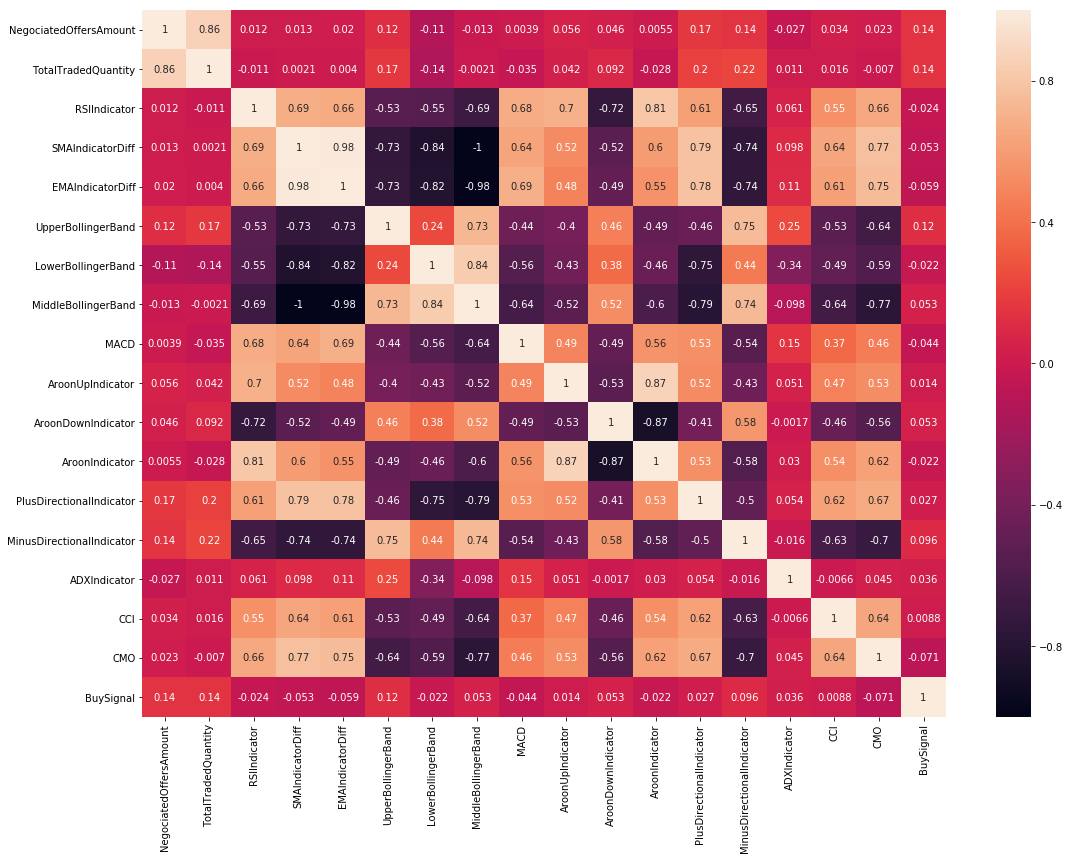

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [21]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5183376288659793
MLP Average Balanced Accuracy Score: 0.5201780094474898
MLP Average Precision Score: 0.2781737656804236
MLP Average Recall Score: 0.539188484198533
MLP Average f1 Score: 0.3574632185890909
MLP Average Profit: 0.16049999999999873
LogReg Average Accuracy Score: 0.5417482817869417
LogReg Average Balanced Accuracy Score: 0.5479520198985476
LogReg Average Precision Score: 0.30005643911797153
LogReg Average Recall Score: 0.5862043880606806
LogReg Average f1 Score: 0.387241771854804
LogReg Average Profit: 0.19499999999999867
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5537574606619642
MLP Average Balanced Accuracy Score: 0.5224036762578106
MLP Average Precision Score: 0.2847667978696271
MLP Average Recall Score: 0.47624217486078213
MLP Average f1 Score: 0.35054669983733644
MLP Average Profit: 0.1652631578947348
LogReg Average Accuracy Score: 0.5659567733767409
LogReg Av

MLP Average Accuracy Score: 0.6485681557846505
MLP Average Balanced Accuracy Score: 0.5977568768115724
MLP Average Precision Score: 0.33482831009146796
MLP Average Recall Score: 0.5108275298471378
MLP Average f1 Score: 0.393046065115618
MLP Average Profit: 0.16999999999999904
LogReg Average Accuracy Score: 0.654524627720504
LogReg Average Balanced Accuracy Score: 0.5888332147347214
LogReg Average Precision Score: 0.32786994838778316
LogReg Average Recall Score: 0.47105867007827795
LogReg Average f1 Score: 0.38055791329883787
LogReg Average Profit: 0.13333333333333383
Days used to train: 16
Days to be predicted: 1
MLP Average Accuracy Score: 0.6072680412371134
MLP Average Balanced Accuracy Score: 0.531097286985862
MLP Average Precision Score: 0.2607187805808496
MLP Average Recall Score: 0.3915329661212014
MLP Average f1 Score: 0.30825740239927885
MLP Average Profit: 0.11199999999999813
LogReg Average Accuracy Score: 0.6185395189003436
LogReg Average Balanced Accuracy Score: 0.5333111533

MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 55
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 56
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall S

MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 88
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 89
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall S

MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 119
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall Score: nan
MLP Average f1 Score: nan
MLP Average Profit: nan
LogReg Average Accuracy Score: nan
LogReg Average Balanced Accuracy Score: nan
LogReg Average Precision Score: nan
LogReg Average Recall Score: nan
LogReg Average f1 Score: nan
LogReg Average Profit: nan
Days used to train: 120
Days to be predicted: 1
MLP Average Accuracy Score: nan
MLP Average Balanced Accuracy Score: nan
MLP Average Precision Score: nan
MLP Average Recall

In [24]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='center right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.2, 0.8)
    plt.xlim(1,20)
    plt.show()

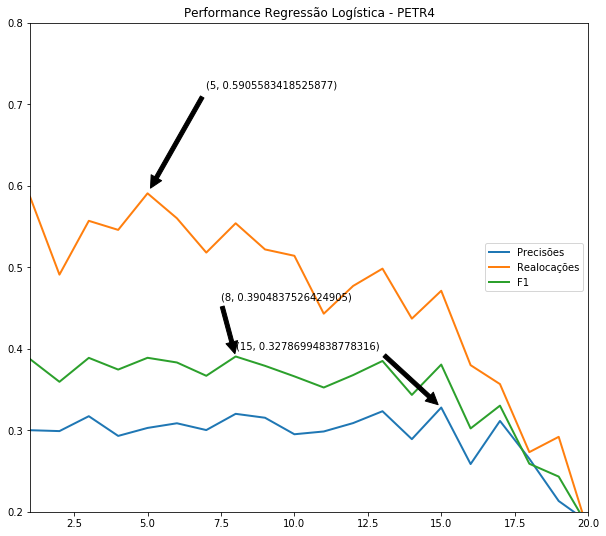

In [27]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(10,9), 'Performance Regressão Logística - PETR4', (8, 0.4),(7, 0.72),(7.5, 0.46))

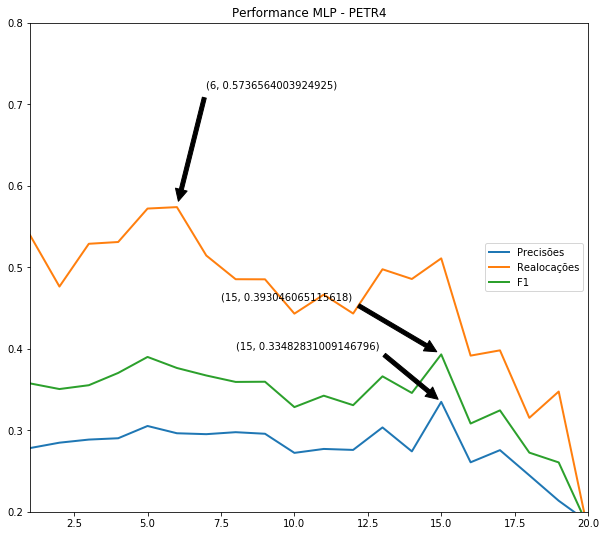

In [29]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (10,9), 'Performance MLP - PETR4',  (8, 0.4),(7, 0.72),(7.5, 0.46))